In [98]:
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("LaTeXStrings")
import Pkg; Pkg.add("numpy")
import numpy as np
using Plots
using LaTeXStrings

   Resolving package versions...
  No Changes to `C:\Users\ACE\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\ACE\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ACE\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\ACE\.julia\environments\v1.7\Manifest.toml`


LoadError: The following package names could not be resolved:
 * numpy (not found in project, manifest or registry)


# Modelo de Hodgkin-Huxley

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

Con [Wells]:
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $V$ la diferencia de potencial en la membrana
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:
\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}
Observemos que cuando $V = 10$ la función está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}

In [17]:
e=2.718281828459045

2.718281828459045

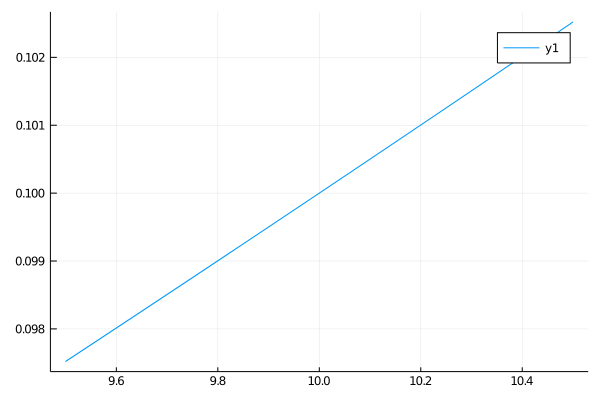

In [39]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado

function alpha_n(V)                         #Si V=10 entonces devuelve 10, de otra manera, ejecuta la división
    if V==10
        return 0.1
    else (0.01(10-V))/(e^((10-V)/10)-1)
    end
end


plot(alpha_n, 9.5:0.00001:10.5)

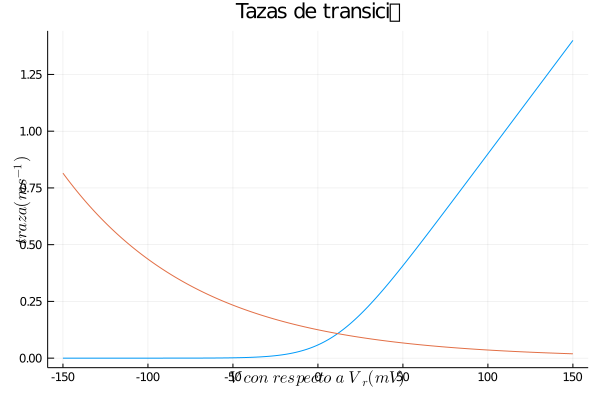

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
latex: failed to create a dvi file
latex: failed to create a dvi file
GKS: c

In [89]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n

function beta_n(V)
   0.125e^(-V/80)
end

function plotAlpha()      #Tuve que modificar por cuestiones de errores, menccionaba error de compatabilidad de los datos a graficar
    a = -150:150
#    alpha = alpha_n(V)
#    beta = beta_n(V)
    plot(
       alpha_n,
        a,
        title="Tazas de transición",
        xlabel=L"V\ con\ respecto\ a\ V_r (mV)",
        ylabel=L"traza (ms^{-1})",
        label=L"\alpha(V)"
    )
    plot!(beta_n, a, label=L"\beta(V)")
end


plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1} & \beta_m(V) &= 4 e^{-\frac{V}{18}} \\
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}} & \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}
Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) &= \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)}
               = \frac{-0.1}{-0.1} = 1
\end{align}

In [66]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus firmas a partir de las llamadas en la función para graficar

function alpha_m(V)
    if V==25
        return 1
    else (0.1(25-V))/(e^((25-V)/10)-1)
    end
end

function beta_m(V)
    4e^(-V/18)
end

function alpha_h(V)
    0.07e^(-V/20)
end

function beta_h(V)
    1/(e^((30-V)/10)+1)
end

function tau_inf(alpha, beta)
    1/(alpha+beta)
end

function n_inf(alpha, beta)
     (alpha)*(tau_inf(alpha, beta))
end

n_inf (generic function with 1 method)

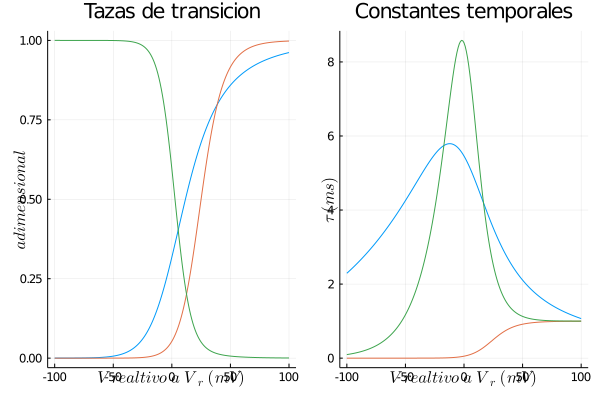

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no

In [101]:
function plotParameters() 
b= -100:100
        function n_inf_n(V)
            n_inf(alpha_n(V), beta_n(V))
        end

        function tau_inf_n(V)
            tau_inf(alpha_n(V), beta_n(V))
        end

    
        function n_inf_m(V)
            n_inf(alpha_m(V), beta_m(V))
        end

        function tau_inf_m(V)
            tau_inf(alpha_m(V), beta_m(V))
        end

    
        function n_inf_h(V)
            n_inf(alpha_h(V), beta_h(V))
        end
    
        function tau_inf_h(V)
            tau_inf(alpha_h(V), beta_h(V))
        end
p1 = plot(
        [n_inf_n, n_inf_m, n_inf_h], b,
        label=[L"n_{\infty}(V)" L"m_{\infty}(V)" L"h_{\infty}(V)"]
        )

p2 = plot(
        [tau_inf_n, n_inf_m, tau_inf_h], b,
        label=[L"\tau_{n}(V)" L"\tau_{m}(V)" L"\tau_{h}(V)"]
        )

    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tazas de transicion" "Constantes temporales"],
        xlabel=[L"V\ realtivo\ a\ V_r\ (mV)" L"V\ realtivo\ a\ V_r\ (mV)"],
        ylabel=[L"adimensional" L"\tau\ (ms)"],
        legend=true
    )
end
plotParameters() #De igual forma tuve que modificar por cuestiones de compatibilidad de los datos a graficar

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproxima a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y a partir de él, se calcula el valor de $y$ para el tiempo $t + \Delta t$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} &= g_{Na}m^3h   &   G_{K} &= g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando el método de Euler produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [93]:
parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,           # mV
    "gNa" => 120.0,    # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.
        """
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
    return Iext
    end
end

makeIext (generic function with 4 methods)

In [ ]:
function pasoh(t0,tf,N)
    (tf-t0)/N
end
## Aquí comenzó el problema por la paquetería numpy que no pudo ser importada por alguna razón ): y la necesitaba para manejar los arrays


In [ ]:
## Implementa aquí el algoritmo de intregración numérica de Euler para calcular V(t)
##
## Asegúrate de que, al ejecutar la simulación con los parámetros por defecto,
## se reproduce la imagen de arriba.
##
## Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
## ¿Qué observas?
##
## Inserta al final una celda con tus comentarios y resultados

function EulerHodkinHuxley(parametros)
    """Devuelve la solucion a las ecuaciones diferenciales del modelo de Hodgkin
    y Huxley utilizando el metodo de Euler"""
end
  

function plotSimulation(resultado)
    tiempo = resultado["T"]
    
    p1 = plot(tiempo, resultado["V"])
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Voltaje en la membrana" "Conductancia de los canales" "Tazas de transición" "Constantes temporales"],
        xlabel="t (ms)",
        ylabel=["Voltaje relativo en la membrana (mV)" L"Conductancia (mS/cm^2)" "adimensional" L"\tau (ms)"],
        legend=true
    )
end
    

function simulaHodkinHuxley(V0, t0, tfin, current)
    iext_func = makeIext(t0, tfin, current)
    parametros["V0"] = V0
    resultado = EulerHodkinHuxley(parametros)
    plotSimulation(resultado)
end


V0 = 0
t0 = 10
tfin = 16 # seleccionar de: -90 a 120
current = 2.4 # seleccionar de: -10 a 10

simulaHodkinHuxley(V0, t0, tfin, current)

# Comentarios y resultados
Se logró realizar efectivamente una parte del modelo de Hodgkin-Huxley, no obstante debido a un problema con la paquetería numpy(The following package names could not be resolved: numpy (not found in project, manifest or registry)), no fue posible seguir con el código del método de Euler para poder resolver las EDO correspondientes, no obstante aun cuando sea fuera del curso, debido a la curiosidad que deja la materia, se continuará intentando hasta poder ejecutar el código como se debería, quedá mucho por aprender sin duda alguna.